In [2]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 3.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=82d89921e34707acd7732e38436298dfb6a92b5040d342ad9c47006bbd3d46d4
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=61c8b41dde9677da1f0d85614b0a7793e1d5401e479b58e03bd3d7d43acf8e4e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
dataset = '/content/drive/MyDrive/chest_xray'

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
datagen = ImageDataGenerator( rescale = 1.0/255.,shear_range = 0.2,
                                   zoom_range = 0.2,horizontal_flip=True,rotation_range = 20)

# --------------------
# Flow training images in batches of 32 using train_datagen generator
# --------------------
train_generator = datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                    batch_size=32,
                                                    target_size=(224, 224),
                                                    class_mode = 'binary')     
# --------------------
# Flow validation images in batches of 32 using test_datagen generator
# --------------------
test_generator =  datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                                         batch_size=32,
                                                         target_size = (224, 224),
                                                         class_mode = 'binary')

Found 4228 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [20]:
train_generator.class_indices

{'COVID-19': 0, 'NORMAL': 1}

# **CNN model**

In [21]:
cnn_model = tf.keras.models.Sequential([
                           tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(224,224,3)),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2), 
                           tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2), 
                           tf.keras.layers.Conv2D(254,(3,3), activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(510,(3,3), activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(510,activation='relu'),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(2, activation='softmax')

])
      

In [22]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 254)      

In [23]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
h = cnn_model.fit(train_generator,
                    validation_data= test_generator,
                    epochs=10)

Epoch 1/10
133/133 [==============================] - 99s 738ms/step - loss: 0.6167 - accuracy: 0.6694 - val_loss: 0.6283 - val_accuracy: 0.7083
Epoch 2/10
133/133 [==============================] - 98s 739ms/step - loss: 0.3304 - accuracy: 0.8545 - val_loss: 0.4141 - val_accuracy: 0.7965
Epoch 3/10
133/133 [==============================] - 98s 738ms/step - loss: 0.2623 - accuracy: 0.8939 - val_loss: 0.5074 - val_accuracy: 0.7933
Epoch 4/10
133/133 [==============================] - 98s 734ms/step - loss: 0.2013 - accuracy: 0.9178 - val_loss: 0.4672 - val_accuracy: 0.8253
Epoch 5/10
133/133 [==============================] - 99s 745ms/step - loss: 0.2087 - accuracy: 0.9193 - val_loss: 0.4427 - val_accuracy: 0.8494
Epoch 6/10
133/133 [==============================] - 98s 735ms/step - loss: 0.1679 - accuracy: 0.9364 - val_loss: 0.3560 - val_accuracy: 0.8526
Epoch 7/10
133/133 [==============================] - 98s 736ms/step - loss: 0.1456 - accuracy: 0.9461 - val_loss: 0.4384 - val_ac

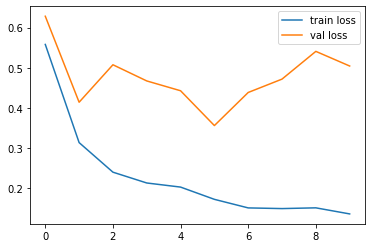

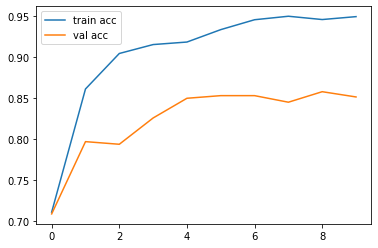

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

# loss
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracy
plt.plot(h.history['accuracy'], label='train acc')
plt.plot(h.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
y_true = test_generator.classes
import numpy as np
y_pred = np.argmax(cnn_model.predict(test_generator), axis=-1)

from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_true,y_pred, average='weighted'))

from sklearn.metrics import precision_score

print("Precision: ",precision_score(y_true, y_pred, average='weighted'))

from sklearn.metrics import accuracy_score

print("Accuracy: ",accuracy_score(y_true, y_pred))

from sklearn.metrics import recall_score
print("Recall:",recall_score(y_true, y_pred, average = 'weighted'))

F1 Score:  0.549965388030278
Precision:  0.5440911891127508
Accuracy:  0.5753205128205128
Recall: 0.5753205128205128


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69       390
           1       0.40      0.26      0.31       234

    accuracy                           0.58       624
   macro avg       0.51      0.51      0.50       624
weighted avg       0.54      0.58      0.55       624



In [ ]:
y_true = test_generator.classes
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
import numpy as np
y_pred = np.argmax(cnn_model.predict(test_generator), axis=-1)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0
 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0
 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print(cm)

[[285 105]
 [179  55]]


     |████████████████████████████████| 1.4MB 5.6MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feabc615710>)

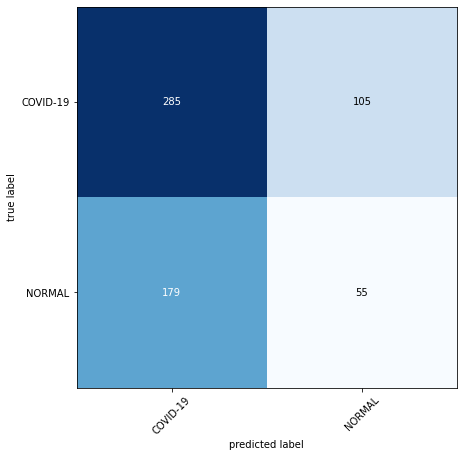

In [ ]:
!pip install mlxtend
import mlxtend                                                          
!pip install mlxtend --upgrade --no-deps

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm, figsize=(7,7), class_names= train_generator.class_indices)

# VGG MODEL

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt



IMAGE_SIZE = [224, 224]

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)

# create a model object
vgg_model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
vgg_model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = vgg_model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
133/133 [==============================] - 104s 754ms/step - loss: 0.4856 - accuracy: 0.8108 - val_loss: 0.3705 - val_accuracy: 0.8782
Epoch 2/10
133/133 [==============================] - 98s 735ms/step - loss: 0.1143 - accuracy: 0.9579 - val_loss: 0.4708 - val_accuracy: 0.8446
Epoch 3/10
133/133 [==============================] - 99s 746ms/step - loss: 0.1003 - accuracy: 0.9637 - val_loss: 0.3369 - val_accuracy: 0.8926
Epoch 4/10
133/133 [==============================] - 99s 742ms/step - loss: 0.0974 - accuracy: 0.9668 - val_loss: 0.3896 - val_accuracy: 0.8750
Epoch 5/10
133/133 [==============================] - 99s 741ms/step - loss: 0.0656 - accuracy: 0.9742 - val_loss: 0.4224 - val_accuracy: 0.8718
Epoch 6/10
133/133 [==============================] - 99s 747ms/step - loss: 0.0545 - accuracy: 0.9818 - val_loss: 0.9559 - val_accuracy: 0.7468
Epoch 7/10
133/133 [==============================] - 99s 742ms/step - loss: 0.0706 - accuracy: 0.9710 - val_loss: 0.3125 - val_a

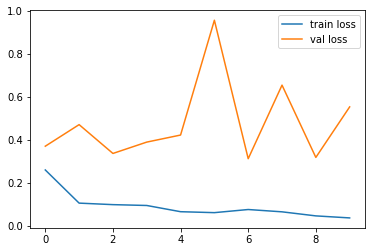

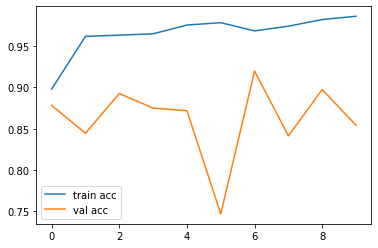

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_true = test_generator.classes
import numpy as np
y_pred = np.argmax(vgg_model.predict(test_generator), axis=-1)

from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_true,y_pred,average='weighted'))

from sklearn.metrics import precision_score

print("Precision: ",precision_score(y_true, y_pred, average='weighted',))

from sklearn.metrics import accuracy_score

print("Accuracy: ",accuracy_score(y_true, y_pred))

from sklearn.metrics import recall_score
print("Recall:",recall_score(y_true, y_pred))

F1 Score:  0.517970245986154
Precision:  0.5082304526748971
Accuracy:  0.5512820512820513
Recall: 0.19658119658119658


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_true))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68       486
           1       0.20      0.33      0.25       138

    accuracy                           0.55       624
   macro avg       0.48      0.47      0.46       624
weighted avg       0.64      0.55      0.58       624



In [ ]:
y_true = test_generator.classes
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
import numpy as np
y_pred = np.argmax(vgg_model.predict(test_generator), axis=-1)
print(y_pred)

[1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print(cm)

[[261 129]
 [188  46]]


Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9b005dd250>)

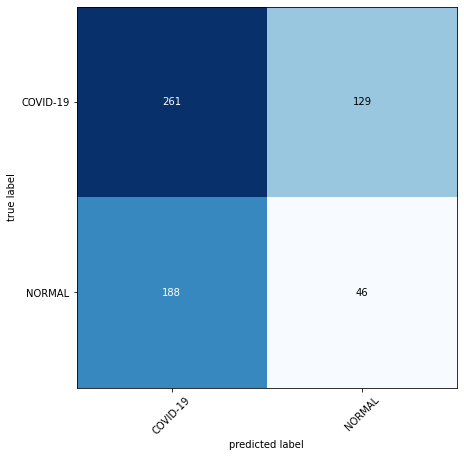

In [ ]:

!pip install mlxtend
import mlxtend                                                          
!pip install mlxtend --upgrade --no-deps

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm, figsize=(7,7), class_names= train_generator.class_indices)

# INCEPTION


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt



IMAGE_SIZE = [224, 224]

In [ ]:
incept = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in incept.layers:
    layer.trainable = False

x = Flatten()(incept.output)
prediction = Dense(2, activation='softmax')(x)

# create a model object
incept_model = Model(inputs=incept.input, outputs=prediction)

In [ ]:
incept_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d_25[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
incept_model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = incept_model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
133/133 [==============================] - 103s 747ms/step - loss: 1.9629 - accuracy: 0.8372 - val_loss: 4.5761 - val_accuracy: 0.7019
Epoch 2/5
133/133 [==============================] - 97s 732ms/step - loss: 0.8767 - accuracy: 0.9013 - val_loss: 1.8726 - val_accuracy: 0.8542
Epoch 3/5
133/133 [==============================] - 98s 735ms/step - loss: 0.9746 - accuracy: 0.9174 - val_loss: 3.7770 - val_accuracy: 0.7724
Epoch 4/5
133/133 [==============================] - 98s 733ms/step - loss: 0.6928 - accuracy: 0.9289 - val_loss: 1.5087 - val_accuracy: 0.8798
Epoch 5/5
133/133 [==============================] - 98s 734ms/step - loss: 0.4961 - accuracy: 0.9460 - val_loss: 2.7094 - val_accuracy: 0.8157


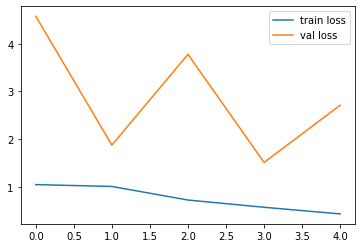

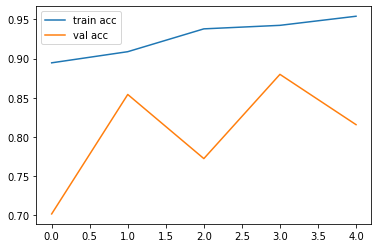

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_true = test_generator.classes
import numpy as np
y_pred = np.argmax(incept_model.predict(test_generator), axis=-1)

from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_true,y_pred,average='weighted'))

from sklearn.metrics import precision_score

print("Precision: ",precision_score(y_true, y_pred, average='weighted',))

from sklearn.metrics import accuracy_score

print("Accuracy: ",accuracy_score(y_true, y_pred))

from sklearn.metrics import recall_score
print("Recall:",recall_score(y_true, y_pred, average='weighted'))

F1 Score:  0.517970245986154
Precision:  0.5082304526748971
Accuracy:  0.5512820512820513
Recall: 0.5512820512820513


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68       486
           1       0.20      0.33      0.25       138

    accuracy                           0.55       624
   macro avg       0.48      0.47      0.46       624
weighted avg       0.64      0.55      0.58       624



In [ ]:
y_true = test_generator.classes
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
import numpy as np
y_pred = np.argmax(incept_model.predict(test_generator), axis=-1)
print(y_pred)


[0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print(cm)

[[196 194]
 [123 111]]


Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f997be98590>)

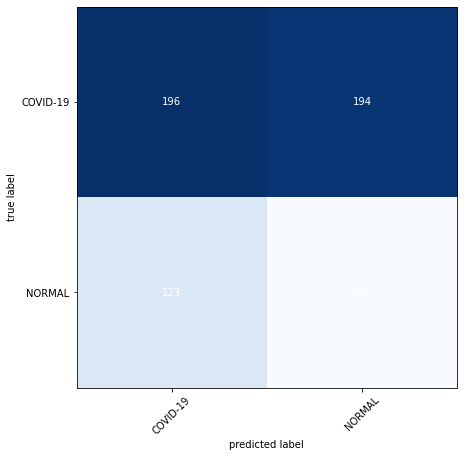

In [ ]:

!pip install mlxtend
import mlxtend                                                          
!pip install mlxtend --upgrade --no-deps

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm, figsize=(7,7), class_names= train_generator.class_indices)

# **RESNET**

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt



IMAGE_SIZE = [224, 224]

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

x = Flatten()(resnet.output)
prediction = Dense(2, activation='softmax')(x)

# create a model object
resnet_model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
resnet_model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = resnet_model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
163/163 [==============================] - 127s 754ms/step - loss: 1.1344 - accuracy: 0.7476 - val_loss: 0.4036 - val_accuracy: 0.8189
Epoch 2/10
163/163 [==============================] - 124s 762ms/step - loss: 0.3477 - accuracy: 0.8479 - val_loss: 0.3296 - val_accuracy: 0.8606
Epoch 3/10
163/163 [==============================] - 127s 780ms/step - loss: 0.3386 - accuracy: 0.8658 - val_loss: 0.3983 - val_accuracy: 0.8349
Epoch 4/10
163/163 [==============================] - 128s 783ms/step - loss: 0.4012 - accuracy: 0.8605 - val_loss: 0.3349 - val_accuracy: 0.8606
Epoch 5/10
163/163 [==============================] - 122s 748ms/step - loss: 0.2330 - accuracy: 0.9056 - val_loss: 0.3646 - val_accuracy: 0.8381
Epoch 6/10
163/163 [==============================] - 126s 772ms/step - loss: 0.2483 - accuracy: 0.9030 - val_loss: 0.3636 - val_accuracy: 0.8478
Epoch 7/10
163/163 [==============================] - 128s 782ms/step - loss: 0.2607 - accuracy: 0.8976 - val_loss: 0.4597 -

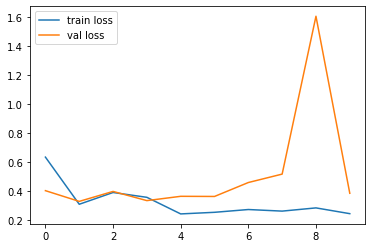

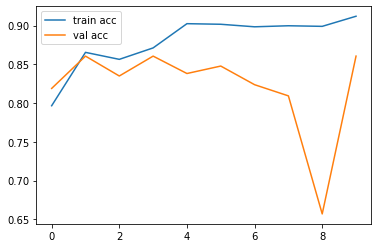

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_true = test_generator.classes
import numpy as np
y_pred = np.argmax(resnet_model.predict(test_generator), axis=-1)

from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_true,y_pred,average='weighted'))

from sklearn.metrics import precision_score

print("Precision: ",precision_score(y_true, y_pred, average='weighted',))

from sklearn.metrics import accuracy_score

print("Accuracy: ",accuracy_score(y_true, y_pred))

from sklearn.metrics import recall_score
print("Recall:",recall_score(y_true, y_pred))

F1 Score:  0.5630392599992515
Precision:  0.557561718894293
Accuracy:  0.5753205128205128
Recall: 0.32905982905982906


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_true))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75       600
           1       0.02      0.21      0.04        24

    accuracy                           0.60       624
   macro avg       0.49      0.41      0.39       624
weighted avg       0.92      0.60      0.72       624



In [ ]:
y_true = test_generator.classes
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
import numpy as np
y_pred = np.argmax(resnet_model.predict(test_generator), axis=-1)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print(cm)

[[373  17]
 [227   7]]


     |████████████████████████████████| 1.4MB 18.6MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd1f7185d50>)

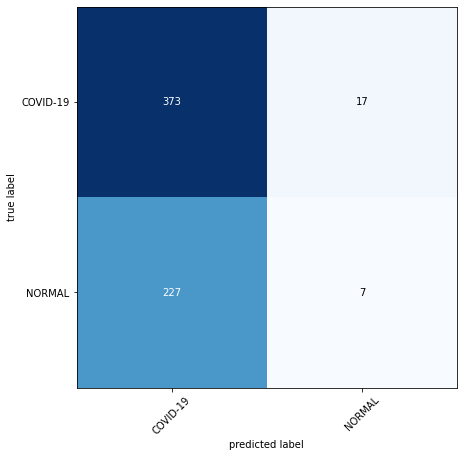

In [ ]:

!pip install mlxtend
import mlxtend                                                          
!pip install mlxtend --upgrade --no-deps

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm, figsize=(7,7), class_names= train_generator.class_indices)